In [13]:
from estimark.agents import IndShkLifeCycleConsumerType
import estimark.calibration.estimation_parameters as parameters
import numpy as np
from HARK.utilities import plot_funcs
import matplotlib.pyplot as plt
import pandas as pd
from HARK.ConsumptionSaving.ConsIndShockModel import init_lifecycle

In [14]:
DiscFacAdj, CRRA = np.genfromtxt(
    "tables/IndShock_estimate_results.csv", skip_header=1, delimiter=","
)

In [15]:
indshk_agent = IndShkLifeCycleConsumerType(
    **{**init_lifecycle, **parameters.init_consumer_objects})
indshk_agent.CRRA = 2
indshk_agent.DiscFac = [init_lifecycle["DiscFac"]
                        for b in parameters.DiscFac_timevary]
CRRA, DiscFacAdj

(3.796066262763537, 0.8689011612165243)

In [16]:
indshk_agent.solve()

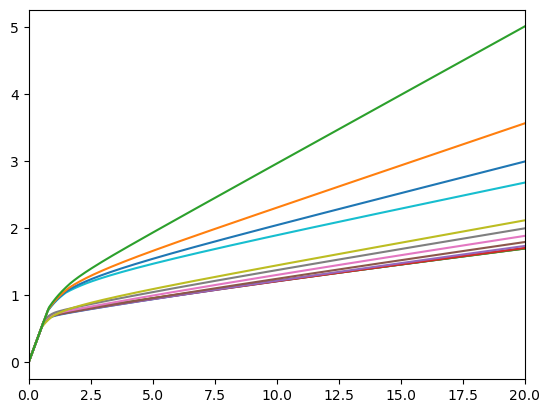

In [17]:
plot_funcs([sol.cFunc for sol in indshk_agent.solution[:-1:5]], 0, 20)
plt.savefig("../content/figures/IndShock_cFunc.png")

In [18]:
# Set up the variables we want to keep track of.
indshk_agent.track_vars = ["aNrm", "cNrm", "pLvl", "t_age", "mNrm"]

indshk_agent.T_sim = 200
# Run the simulations
indshk_agent.initialize_sim()
history = indshk_agent.simulate()

In [19]:
raw_data = {
    "Age": indshk_agent.history["t_age"].flatten() + 25 - 1,
    "pIncome": indshk_agent.history["pLvl"].flatten(),
    "nrmM": indshk_agent.history["mNrm"].flatten(),
    "nrmC": indshk_agent.history["cNrm"].flatten(),
}

Data = pd.DataFrame(raw_data)
Data["Cons"] = Data.nrmC * Data.pIncome
Data["M"] = Data.nrmM * Data.pIncome

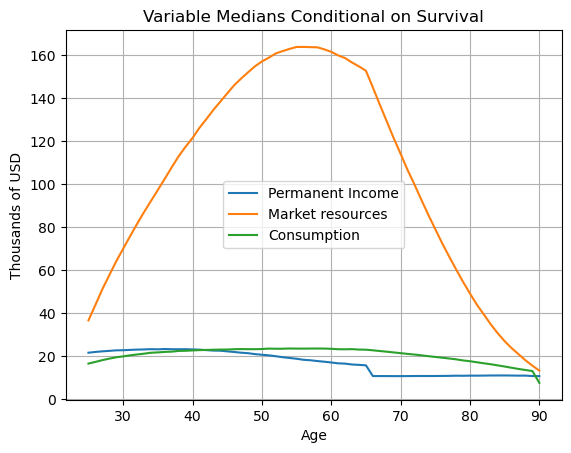

In [20]:
# Find the mean of each variable at every age
AgeMeans = Data.groupby(["Age"]).median().reset_index()

plt.figure()
plt.plot(AgeMeans.Age, AgeMeans.pIncome, label="Permanent Income")
plt.plot(AgeMeans.Age, AgeMeans.M, label="Market resources")
plt.plot(AgeMeans.Age, AgeMeans.Cons, label="Consumption")
plt.legend()
plt.xlabel("Age")
plt.ylabel("Thousands of USD")
plt.title("Variable Medians Conditional on Survival")
plt.grid()

In [21]:
indshk_agent = IndShkLifeCycleConsumerType(**parameters.init_consumer_objects)
indshk_agent.CRRA = CRRA
indshk_agent.DiscFac = [b * DiscFacAdj for b in parameters.DiscFac_timevary]

lifecycle_agent = IndShkLifeCycleConsumerType(**init_lifecycle)


lifecycle_agent.DiscFac = [
    init_lifecycle["DiscFac"] for b in parameters.DiscFac_timevary
]

In [22]:
param_list = set(lifecycle_agent.__dict__.keys()).union(
    set(indshk_agent.__dict__.keys())
)

for param in param_list:
    current_value = getattr(indshk_agent, param, None)
    original_value = getattr(lifecycle_agent, param, None)

    if current_value is None:
        print(f"{param} not in indshk_agent\n")
    elif original_value is None:
        print(f"{param} not in lifecycle_agent\n")
    else:
        print(f"{param}")
        print(f"current:  {current_value}")
        print(f"original: {original_value}")
        print("\n")

aXtraExtra
current:  [None, None]
original: [None]


NewbornTransShk
current:  False
original: False


neutral_measure
current:  False
original: False


T_cycle
current:  65
original: 65


shock_vars
current:  ['PermShk', 'TranShk']
original: ['PermShk', 'TranShk']


track_vars
current:  []
original: []


IncUnemp
current:  0.3
original: 0.3


T_age
current:  66
original: 65


verbose
current:  1
original: 1


CubicBool
current:  False
original: False


MaxKinks
current:  400
original: 400


shock_history
current:  {}
original: {}


TranShkCount
current:  7
original: 7


time_inv
current:  ['CRRA', 'BoroCnstArt', 'BoroCnstArt', 'vFuncBool', 'CubicBool', 'Rfree', 'aXtraGrid']
original: ['CRRA', 'BoroCnstArt', 'BoroCnstArt', 'vFuncBool', 'CubicBool', 'Rfree', 'aXtraGrid']


tax_rate
current:  0.0
original: 0.0


PermGroFacAgg
current:  1.0
original: 1.016128685406095


aXtraNestFac
current:  1
original: 3


PermShkStd
current:  [0.25109284348539185, 0.25109284348539185, 0.240155661513851

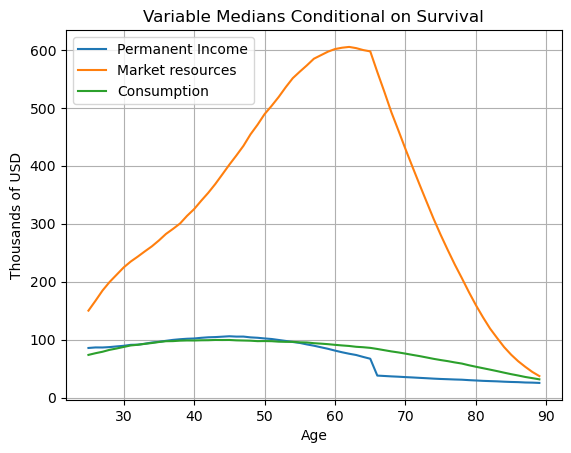

In [23]:
lifecycle_agent.solve()
# Set up the variables we want to keep track of.
lifecycle_agent.track_vars = ["aNrm", "cNrm", "pLvl", "t_age", "mNrm"]

lifecycle_agent.T_sim = 200
# Run the simulations
lifecycle_agent.initialize_sim()
history = lifecycle_agent.simulate()

raw_data = {
    "Age": lifecycle_agent.history["t_age"].flatten() + 25 - 1,
    "pIncome": lifecycle_agent.history["pLvl"].flatten(),
    "nrmM": lifecycle_agent.history["mNrm"].flatten(),
    "nrmC": lifecycle_agent.history["cNrm"].flatten(),
}

Data = pd.DataFrame(raw_data)
Data["Cons"] = Data.nrmC * Data.pIncome
Data["M"] = Data.nrmM * Data.pIncome

# Find the mean of each variable at every age
AgeMeans = Data.groupby(["Age"]).median().reset_index()

plt.figure()
plt.plot(AgeMeans.Age, AgeMeans.pIncome, label="Permanent Income")
plt.plot(AgeMeans.Age, AgeMeans.M, label="Market resources")
plt.plot(AgeMeans.Age, AgeMeans.Cons, label="Consumption")
plt.legend()
plt.xlabel("Age")
plt.ylabel("Thousands of USD")
plt.title("Variable Medians Conditional on Survival")
plt.grid()

In [24]:
init_lifecycle["PermShkStd"]

[0.25109284348539185,
 0.25109284348539185,
 0.2401556615138516,
 0.22965736371530632,
 0.21962767025150165,
 0.21009896926797503,
 0.20110619927478707,
 0.19268653734486252,
 0.1848788262215825,
 0.17772267203735634,
 0.171257156414067,
 0.16551913914067418,
 0.16054118533450223,
 0.15634923267876932,
 0.15296020779851555,
 0.1503798811549553,
 0.1486012841616004,
 0.14760397284848412,
 0.14735430340072433,
 0.14780671189307693,
 0.14890581414586615,
 0.15058901548290243,
 0.15278927648771345,
 0.1554377187140465,
 0.15846584612549913,
 0.16180726687440605,
 0.16539889573485034,
 0.16918168433697162,
 0.17310096205313782,
 0.17310096205313782,
 0.17310096205313782,
 0.17310096205313782,
 0.17310096205313782,
 0.17310096205313782,
 0.17310096205313782,
 0.17310096205313782,
 0.17310096205313782,
 0.17310096205313782,
 0.17310096205313782,
 0.17310096205313782,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 